In [80]:
import numpy as np
import pandas as pd
import datetime as dt
import pathlib as path
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.ticker as mtick
import os
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator

In [48]:
plot_output_dir = "C:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Plots"
data_output_dir = "C:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Data"

import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Bloomberg\\Financial': ['.ipynb_checkpoints', '10ygsec.png', '12m_tbill.png', '3bbb_yield.csv', 'call_rate.csv', 'dollarspot.csv', 'gsec_tenyr.csv', 'New Microsoft Excel Worksheet.xlsx', 'new.ipynb', 'tbill_oneyr.csv', 'tbill_oneyr.xlsx', 'usdinr.csv', 'usdinr.png', 'vix.csv', 'VIX.png', 'wti.csv']


In [49]:
local_path = os.getcwd()+"\\"

In [50]:
bl_path = "D:\\Downloads\\Vibhav tracker updates\\Bloomberg 10 Year Govt Bond TR Index.xlsx"

directory = "D:\\Downloads\\Vibhav tracker updates"
files = os.listdir(directory)  # Get all the files in that directory
print("Files in %r: %s" % (directory, files))


Files in 'D:\\Downloads\\Vibhav tracker updates': ['Bloomberg 10 Year Govt Bond TR Index.xlsx', 'Economic indicators 1.xlsx', 'Economic indicators 10 AUG.xlsx', 'Economic indicators 17 July.xlsx', 'Economic indicators 18th June.xlsx', 'Economic indicators 2 apr.xlsx', 'Economic indicators 2 July.xlsx', 'Economic indicators 22 May.xlsx', 'Economic indicators 25 Sept.xlsx', 'Economic indicators 28 AUG.xlsx', 'Economic indicators 28 March.xlsx', 'Economic indicators 29 May.xlsx', 'Economic indicators 29 oct.xlsx', 'Economic indicators 30 July.xlsx', 'Economic indicators 4 oct.xlsx', 'Economic indicators 9 sept.xlsx', 'Economic indicators June 4.xlsx', 'input-data (2).xlsx', 'input-data.xlsx', 'NIMF Tracker-13 Mar 2022.pdf', 'NIMF Tracker-27 Mar 2022.pdf', 'notes tracker.docx', 'tracker 27 march vibhav 1.indd', 'tracker 27 march vibhav.indd', 'tracker.indd', '~$Bloomberg 10 Year Govt Bond TR Index.xlsx']


In [5]:
def concatter(file_name, col1, col2, rename_from, rename_to):
    local_df = pd.read_csv(local_path+file_name, index_col=0, parse_dates=True)
    local_df.dropna(inplace=True)
    last_date_in_local = local_df.index[0].to_pydatetime().strftime("%Y-%m-%d")

    bl_df = pd.read_excel(bl_path, sheet_name="Worksheet", usecols=[col1, col2], skiprows=7, index_col=0, parse_dates=True)
    bl_df.dropna(inplace=True)
    bl_df.index.rename("Date", inplace=True)
    bl_df.rename(columns={rename_from: rename_to}, inplace=True)

    final_df = pd.concat([bl_df[:last_date_in_local][:-1], local_df])
    return final_df

In [51]:
def concatter2(file_name, col1, col2, rename_from, rename_to):
    local_df = pd.read_csv(local_path+file_name, index_col=0, parse_dates=True)
    local_df.dropna(inplace=True)
    last_date_in_local = local_df.index[0].to_pydatetime().strftime("%Y-%m-%d")

    bl_df = pd.read_excel(bl_path, sheet_name="Worksheet (2)", usecols=[col1, col2], skiprows=7, index_col=0, parse_dates=True)
    bl_df.dropna(inplace=True)
    bl_df.index.rename("Date", inplace=True)
    bl_df.rename(columns={rename_from: rename_to}, inplace=True)

    final_df = pd.concat([bl_df[last_date_in_local:][:-1], local_df])
    return final_df

# 3ybbb

In [7]:
bbb = concatter2(file_name = "3bbb_yield.csv", col1=9, col2=10, rename_from="PX_LAST.3", rename_to="3BBB")
#Bloomberg 10 Year Govt Bond TR Index (13)

In [8]:
bbb.head()

,3BBB
Date,
2022-10-28,11.7197
2022-10-27,11.6734
2022-10-25,11.7127
2022-10-21,11.7243
2022-10-20,11.7098


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17680\979223966.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


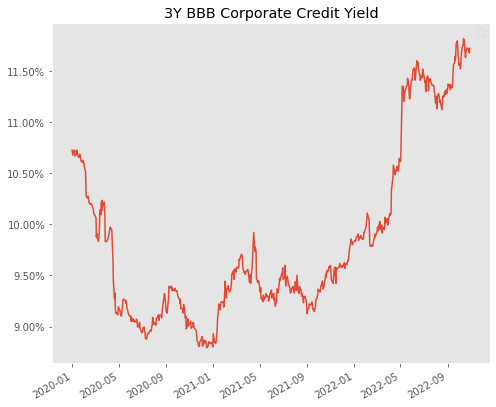

In [9]:
ax = bbb.plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('3Y BBB Corporate Credit Yield')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'\\3ybbb.png', dpi=150, bbox_inches='tight')

In [10]:
bbb.to_csv(data_output_dir+"\\3bbb_yield.csv")
bbb.to_csv("3bbb_yield.csv")

In [11]:
bbb.round(2)

,3BBB
Date,
2022-10-28,11.72
2022-10-27,11.67
2022-10-25,11.71
2022-10-21,11.72
2022-10-20,11.71
...,...
2020-01-07,10.71
2020-01-06,10.72
2020-01-03,10.68


# call

In [12]:
call = concatter2(file_name = "call_rate.csv", col1=3, col2=4, rename_from="PX_LAST.1", rename_to="call rate")

In [13]:
call.round(2)

,call rate
Date,
2022-10-28,6.18
2022-10-27,6.15
2022-10-25,6.17
2022-10-21,6.20
2022-10-20,6.13
...,...
2019-01-07,6.36
2019-01-04,6.35
2019-01-03,6.34


In [14]:
call.rolling(5).mean()


,call rate
Date,
2022-10-28,NaN
2022-10-27,NaN
2022-10-25,NaN
2022-10-21,NaN
2022-10-20,6.167040
...,...
2019-01-07,6.372516
2019-01-04,6.364908
2019-01-03,6.356380


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17680\1140417124.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


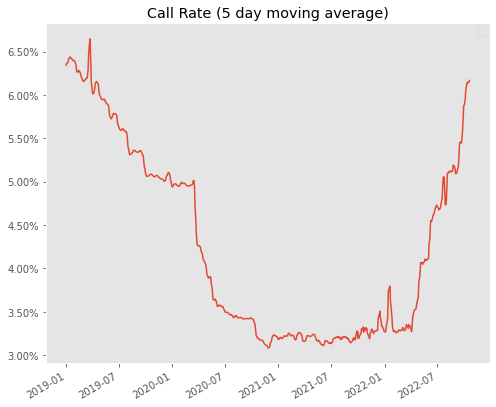

In [15]:
ax = call.rolling(5).mean().plot(figsize=(7,6))
#
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title('Call Rate (5 day moving average)')
# 
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'\\call.png', dpi=300, bbox_inches='tight')

In [16]:
call.to_csv(data_output_dir+"\\call_rate.csv")
call.to_csv("call_rate.csv")

In [17]:
call[::-1].rolling(5).mean().round(2)

,call rate
Date,
2019-01-01,NaN
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,NaN
2019-01-07,6.34
...,...
2022-10-20,6.14
2022-10-21,6.15
2022-10-25,6.15


# gsec

In [18]:
ten_yr = concatter2(file_name = "gsec_tenyr.csv", col1=6, col2=7, rename_from="PX_LAST.2", rename_to="10Y")

In [19]:
ten_yr.round(2)

,10Y
Date,
2022-10-28,7.42
2022-10-27,7.41
2022-10-25,7.44
2022-10-21,7.51
2022-10-20,7.48
...,...
2020-01-07,6.55
2020-01-06,6.57
2020-01-03,6.52


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17680\2694075316.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


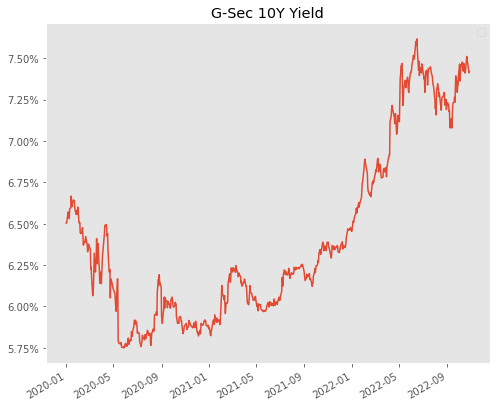

In [20]:
ax=ten_yr.plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('G-Sec 10Y Yield')
plt.grid(b=False)
plt.tight_layout()
plt.legend("")
plt.xlabel("")
plt.savefig(plot_output_dir+'\\10ygsec.png', dpi=300, bbox_inches='tight')


In [21]:
ten_yr

,10Y
Date,
2022-10-28,7.418
2022-10-27,7.412
2022-10-25,7.442
2022-10-21,7.511
2022-10-20,7.477
...,...
2020-01-07,6.554
2020-01-06,6.571
2020-01-03,6.515


In [22]:
ten_yr.to_csv(data_output_dir+"\\gsec_tenyr.csv")
ten_yr.to_csv("gsec_tenyr.csv")

# 1 yr t bill - somehow there is a parsing issue, do this manually

In [23]:
# new = pd.read_csv("/Users/vibhav/Desktop/tbill_oneyr 2.csv", index_col=0, parse_dates=True, dayfirst=True)

In [31]:
# new

In [32]:
# new.plot()

In [33]:
# new

In [23]:
one_yr = concatter2(file_name = "tbill_oneyr.csv", col1=18, col2=19, rename_from="PX_LAST.6", rename_to="12M")

In [35]:
# one_yr = pd.read_excel("/Users/vibhav/Google Drive/NIMF/NIMF/Tracker/Untitled Folder/2020-06-24/New/Copy/tbill_oneyr.xlsx", index_col=0, parse_dates=True)

In [36]:
# one_yr.index = pd.to_datetime(one_yr.index, format="%Y-%m-%d", dayfirst=True)

In [37]:
# one_yr = new

In [24]:
one_yr.head(10)

,12M
Date,
2022-10-28,6.91
2022-10-27,6.87
2022-10-25,6.90
2022-10-21,6.92
2022-10-20,6.92
2022-10-19,6.91
2022-10-18,6.85
2022-10-17,6.93
2022-10-14,6.98


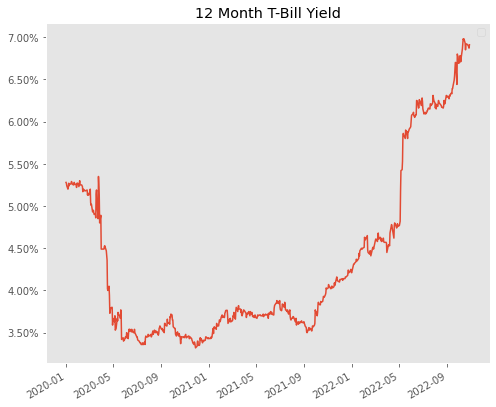

In [41]:
ax = one_yr.plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('12 Month T-Bill Yield')
plt.grid(visible=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'\\12m_tbill.png', dpi=300, bbox_inches='tight')

In [26]:

one_yr.to_csv(data_output_dir+"\\tbill_oneyr.csv")
one_yr.to_csv("tbill_oneyr.csv")


# vix

In [27]:
vix = concatter2(file_name="vix.csv", col1=21, col2=22, rename_from="PX_LAST.7", rename_to="VIX")

C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17680\1759729172.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


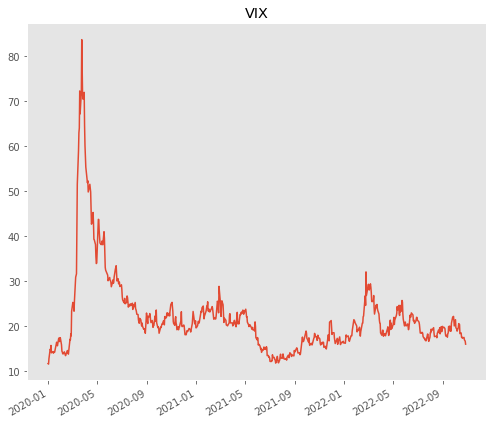

In [28]:
vix['VIX'].plot(figsize=(7,6))
plt.title('VIX')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")


plt.savefig(plot_output_dir+"\\vix.png", dpi=150, bbox_inches='tight')



In [29]:
vix.round(2).head(7)

,VIX
2022-10-28,15.92
2022-10-27,16.60
2022-10-25,16.88
2022-10-24,17.42
2022-10-21,17.28
2022-10-20,17.23
2022-10-19,17.49


In [30]:
vix.to_csv(data_output_dir+"\\vix.csv")
vix.to_csv("vix.csv")

# wti

In [31]:
wti = concatter2(file_name="wti.csv", col1=15, col2=16, rename_from="PX_LAST.5", rename_to="WTI")

C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17680\218164143.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


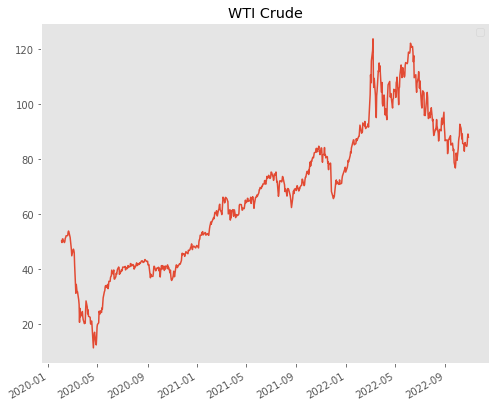

In [32]:
wti.plot(figsize=(7,6))
plt.title('WTI Crude')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'\\WTI.png', dpi=350, bbox_inches='tight')

In [33]:
wti.to_csv(data_output_dir+"\\wti.csv")
wti.to_csv("wti.csv")


In [35]:
wti.head(9)



,WTI
Date,
2022-10-28,87.90
2022-10-27,89.08
2022-10-26,87.91
2022-10-25,85.32
2022-10-24,84.58
2022-10-21,85.05
2022-10-20,85.98
2022-10-19,85.55
2022-10-18,82.82


In [36]:
a=87.9/86
a-1


0.02209302325581408

# usd inr

In [62]:
# import yfinance as yf

In [41]:
# nifty_comm = yf.download("^CNXCMDT", start='2020-01-01', end=dt.datetime.today())

In [42]:
# nifty_comm

In [37]:
usd_inr = concatter2(file_name="usdinr.csv", col1=12, col2=13, rename_from="PX_LAST.4", rename_to="USD INR")

In [38]:
usd_inr.round(2)

,USD INR
Date,
2022-10-28,82.47
2022-10-27,82.50
2022-10-25,82.73
2022-10-21,82.69
2022-10-20,82.76
...,...
2021-12-27,75.00
2021-12-28,74.66
2021-12-29,74.74


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17680\2180202844.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


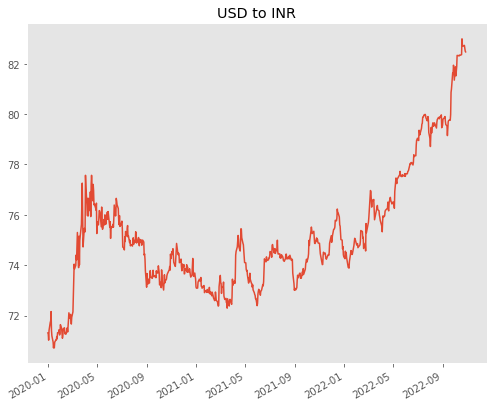

In [39]:
usd_inr['USD INR'].plot(figsize=(7,6), x_compat=True)
plt.title('USD to INR')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.savefig(plot_output_dir+'\\usdinr.png', dpi=150, bbox_inches='tight')

In [40]:
usd_inr.to_csv("usdinr.csv")
usd_inr.to_csv(data_output_dir+"\\usdinr.csv")


## CURRENCIES- ADXY, DXY, JPM EM, Bitcoin

In [97]:
dxy_spot = pd.read_excel(bl_path, sheet_name="Worksheet (2)", usecols=[44, 45], skiprows=7, index_col=0, parse_dates=True)

dxy_spot.rename(columns = {'PX_LAST.14':'Dollar Index (Spot)'}, inplace = True)
dxy_spot=dxy_spot.dropna()
dxy_spot

,Dollar Index (Spot)
Date.14,
2022-10-28,110.752
2022-10-21,112.012
2022-10-14,113.311
2022-10-07,112.795
2022-09-30,112.117
...,...
2018-02-02,89.195
2018-01-26,89.067
2018-01-19,90.572


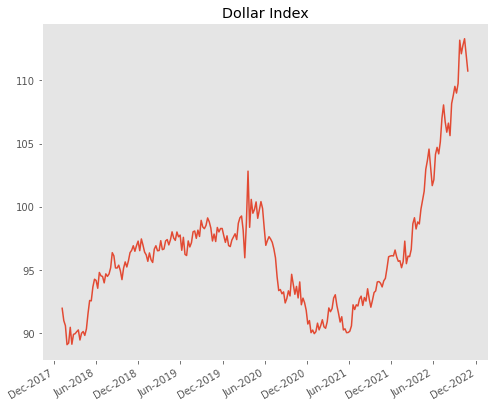

In [84]:
dxy_spot['Dollar Index (Spot)'].plot(figsize=(7,6), x_compat=True)
plt.title('Dollar Index')
plt.grid(visible=False)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.tight_layout()
plt.xlabel("")
plt.savefig(plot_output_dir+'\\dxyspot.png', dpi=150, bbox_inches='tight')

In [85]:
dxy_spot.to_csv("dollarspot.csv")
dxy_spot.to_csv(data_output_dir+"\\dollarspot.csv")

In [101]:
jpmadxy_index= pd.read_excel(bl_path, sheet_name="Worksheet (2)", usecols=[48, 49], skiprows=7, index_col=0, parse_dates=True)

jpmadxy_index.rename(columns = {'PX_LAST.15':'JP Morgan Asia Dollar Index'}, inplace = True)
jpmadxy_index=jpmadxy_index.dropna()
jpmadxy_index

,JP Morgan Asia Dollar Index
Date.15,
2022-10-28,96.28
2022-10-21,96.30
2022-10-14,96.34
2022-10-07,97.12
2022-09-30,96.99
...,...
2018-02-02,111.67
2018-01-26,111.92
2018-01-19,111.03


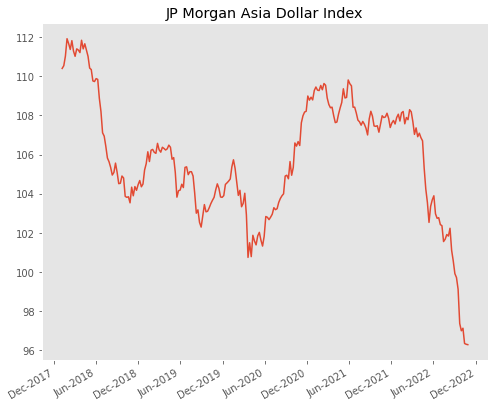

In [117]:
jpmadxy_index['JP Morgan Asia Dollar Index'].plot(figsize=(7,6), x_compat=True)
plt.title('JP Morgan Asia Dollar Index')
plt.grid(visible=False)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.tight_layout()
plt.xlabel("")
plt.savefig(plot_output_dir+'\\jpmadxyspot.png', dpi=150, bbox_inches='tight')

In [104]:
jpmadxy_index.to_csv("jpmasiadollarindex.csv")
jpmadxy_index.to_csv(data_output_dir+"\\jpmasiadollarindex.csv")

In [107]:
jpm_emcurncy = pd.read_excel(bl_path, sheet_name="Worksheet (2)", usecols=[51, 52], skiprows=7, index_col=0, parse_dates=True)

jpm_emcurncy.rename(columns = {'PX_LAST.16':'JP Morgan Emerging Markets Currency Index'}, inplace = True)
jpm_emcurncy=jpm_emcurncy.dropna()
jpm_emcurncy

,JP Morgan Emerging Markets Currency Index
Date.16,
2022-10-28,48.807
2022-10-21,48.713
2022-10-14,48.288
2022-10-07,48.577
2022-09-30,48.435
...,...
2018-02-02,71.269
2018-01-26,71.780
2018-01-19,70.955


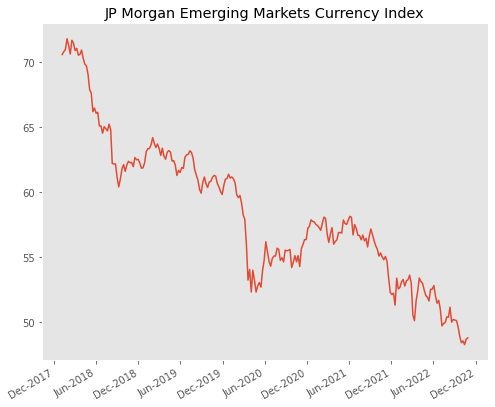

In [116]:
jpm_emcurncy['JP Morgan Emerging Markets Currency Index'].plot(figsize=(7,6), x_compat=True)
plt.title('JP Morgan Emerging Markets Currency Index')
plt.grid(visible=False)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.tight_layout()
plt.xlabel("")
plt.savefig(plot_output_dir+'\\jpmemcurncy.png', dpi=150, bbox_inches='tight')

In [ ]:
jpm_emcurncy.to_csv("jpmemcurrncy.csv")
jpm_emcurncy.to_csv(data_output_dir+"\\jpmemcurrncy.csv")

In [112]:
bitcoin_index = pd.read_excel(bl_path, sheet_name="Worksheet (2)", usecols=[54, 55], skiprows=7, index_col=0, parse_dates=True)

bitcoin_index.rename(columns = {'PX_LAST.17':'Bitcoin (US$/Coin)'}, inplace = True)
bitcoin_index=bitcoin_index.dropna()
bitcoin_index

,Bitcoin (US$/Coin)
Date.17,
2022-10-30,20854.13
2022-10-23,19497.58
2022-10-16,19332.84
2022-10-09,19485.50
2022-10-02,19234.63
...,...
2018-02-04,8077.39
2018-01-28,11755.16
2018-01-21,11366.62


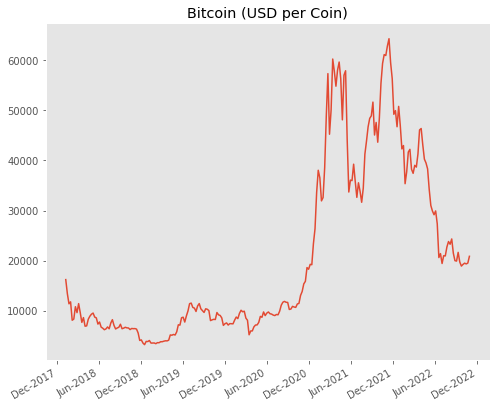

In [115]:
bitcoin_index['Bitcoin (US$/Coin)'].plot(figsize=(7,6), x_compat=True)
plt.title('Bitcoin (USD per Coin)')
plt.grid(visible=False)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.tight_layout()
plt.xlabel("")
plt.savefig(plot_output_dir+'\\bitcoinusdcross.png', dpi=150, bbox_inches='tight')

In [ ]:
bitcoin_index.to_csv("bitcoin.csv")
bitcoin_index.to_csv(data_output_dir+"\\bitcoin.csv")